In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load your historical inventory data (for simplicity, we use random data here)
# Assume we have daily sales data for the last 2 years
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
sales_data = np.random.randint(100, 500, size=(len(date_rng),))  # Simulated sales data

In [2]:
# Create a DataFrame with date and sales data
data = pd.DataFrame({'ds': date_rng, 'y': sales_data})

In [3]:
# 2. Prepare the data for Prophet model (Prophet expects columns 'ds' for date and 'y' for the target)
# This is the structure Prophet needs, so make sure to format it correctly

# 3. Train Prophet model for demand forecasting
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsoyfjf26/9cgk_olp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsoyfjf26/s1_cxumd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96350', 'data', 'file=/tmp/tmpsoyfjf26/9cgk_olp.json', 'init=/tmp/tmpsoyfjf26/s1_cxumd.json', 'output', 'file=/tmp/tmpsoyfjf26/prophet_modelc9f5wk0f/prophet_model-20241226141409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [4]:
# 4. Make future predictions (let's predict for the next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

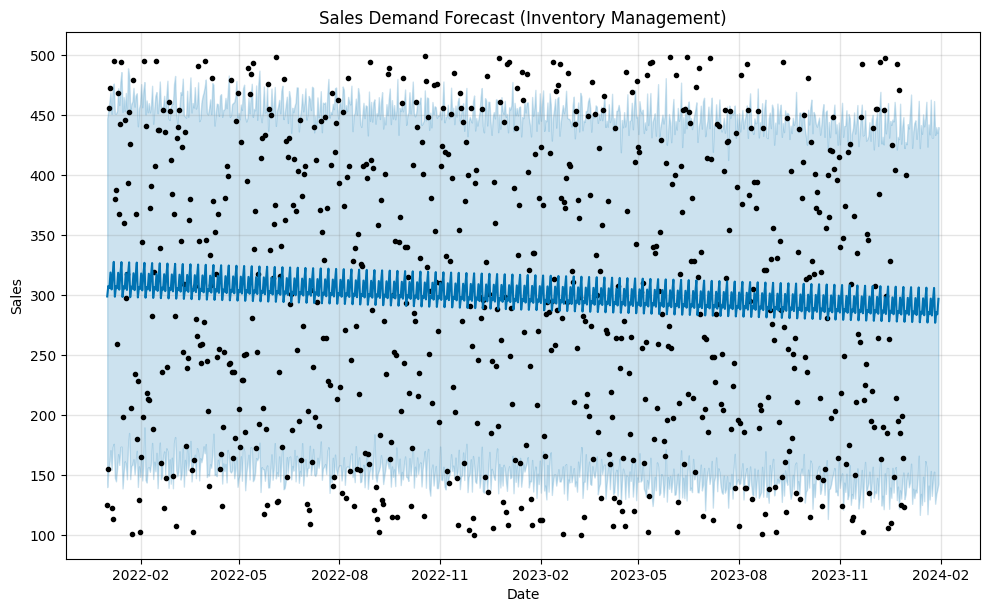

In [5]:
# 5. Visualize the forecast
fig = model.plot(forecast)
plt.title('Sales Demand Forecast (Inventory Management)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [6]:
# 6. Calculate optimal inventory levels for the next 30 days based on forecasted demand
forecasted_demand = forecast[['ds', 'yhat']].tail(30)  # Predicted demand for the next 30 days

In [7]:
# Assuming a simple replenishment rule: keep a safety stock of 10% of the predicted demand
safety_stock = 0.10 * forecasted_demand['yhat']

In [8]:
# Calculate the required inventory level (predicted demand + safety stock)
forecasted_demand['optimal_inventory'] = forecasted_demand['yhat'] + safety_stock

In [9]:
# Show the forecasted demand and calculated optimal inventory levels
print(forecasted_demand[['ds', 'yhat', 'optimal_inventory']])

            ds        yhat  optimal_inventory
730 2024-01-01  284.492652         312.941917
731 2024-01-02  297.434914         327.178405
732 2024-01-03  283.328828         311.661711
733 2024-01-04  295.886421         325.475063
734 2024-01-05  306.309354         336.940289
735 2024-01-06  277.264773         304.991250
736 2024-01-07  286.055166         314.660682
737 2024-01-08  284.289598         312.718558
738 2024-01-09  297.231860         326.955045
739 2024-01-10  283.125774         311.438351
740 2024-01-11  295.683366         325.251703
741 2024-01-12  306.106299         336.716929
742 2024-01-13  277.061718         304.767890
743 2024-01-14  285.852112         314.437323
744 2024-01-15  284.086543         312.495198
745 2024-01-16  297.028805         326.731686
746 2024-01-17  282.922719         311.214991
747 2024-01-18  295.480312         325.028343
748 2024-01-19  305.903245         336.493570
749 2024-01-20  276.858664         304.544530
750 2024-01-21  285.649057        

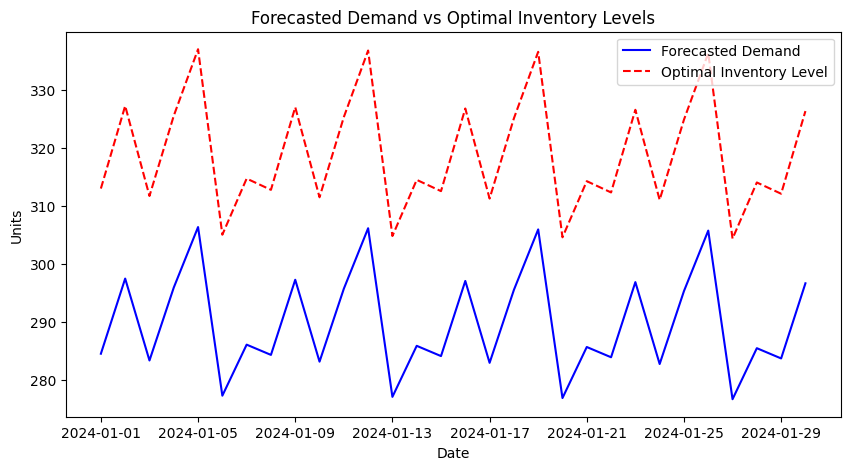

In [10]:
# Optional: Visualize the forecasted demand and optimal inventory levels
plt.figure(figsize=(10, 5))
plt.plot(forecasted_demand['ds'], forecasted_demand['yhat'], label='Forecasted Demand', color='blue')
plt.plot(forecasted_demand['ds'], forecasted_demand['optimal_inventory'], label='Optimal Inventory Level', color='red', linestyle='--')
plt.title('Forecasted Demand vs Optimal Inventory Levels')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.show()